In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("C:/Users/Admin/dataset - Copy.csv")
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [59]:
df = df[df['price'] > 0]


In [113]:
df=df.drop(["name","description","exterior_color","interior_color"],axis=1)     

KeyError: "['name', 'description', 'exterior_color', 'interior_color'] not found in axis"

In [ ]:
df=df.dropna(subset=["price"])

In [ ]:
df.isnull().sum()

In [ ]:
df['cylinders'].value_counts

In [ ]:
df['cylinders'].fillna(df['cylinders'].mode()[0],inplace=True)

In [ ]:
df.info()

In [ ]:
df['doors']=df['doors'].fillna(df['doors'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])
df['engine'] = df['engine'].fillna(df['engine'].mode()[0])
df['mileage'] = df['mileage'].fillna(df['mileage'].mode()[0])
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])


In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

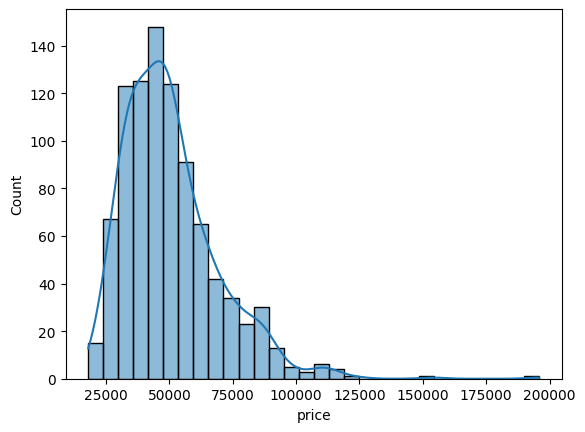

In [101]:
import seaborn as sns

sns.histplot(df['price'],bins=30,kde=True)
plt.show()

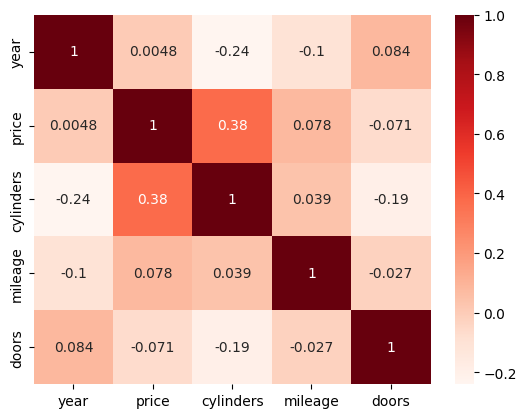

In [103]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Reds')
plt.show()

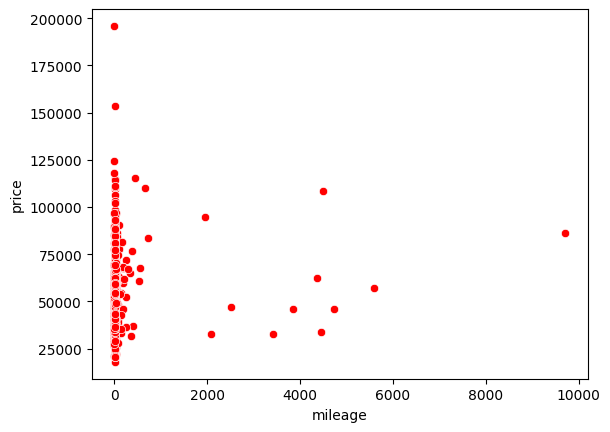

In [105]:
sns.scatterplot(x='mileage',y='price',data=df,color='r')
plt.show()

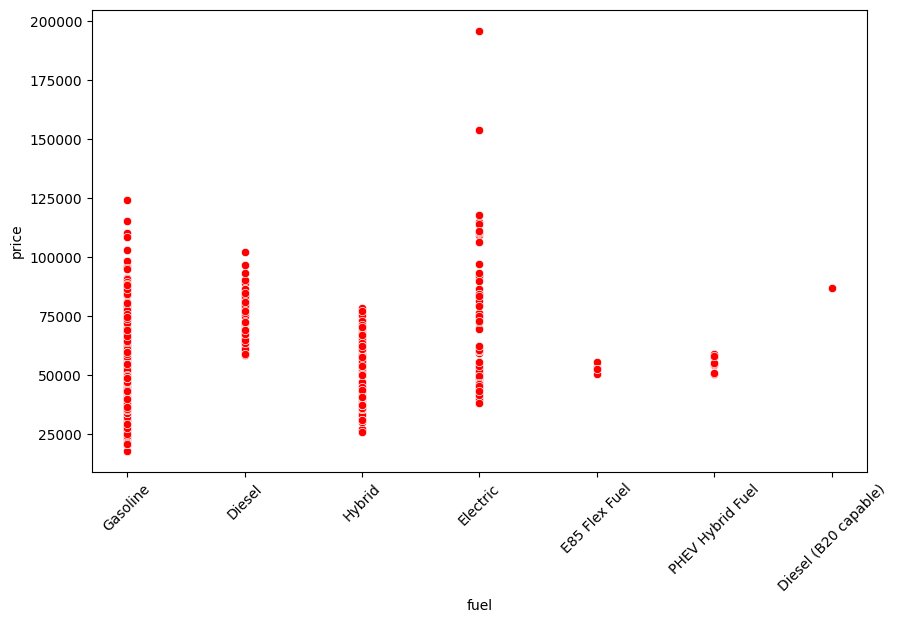

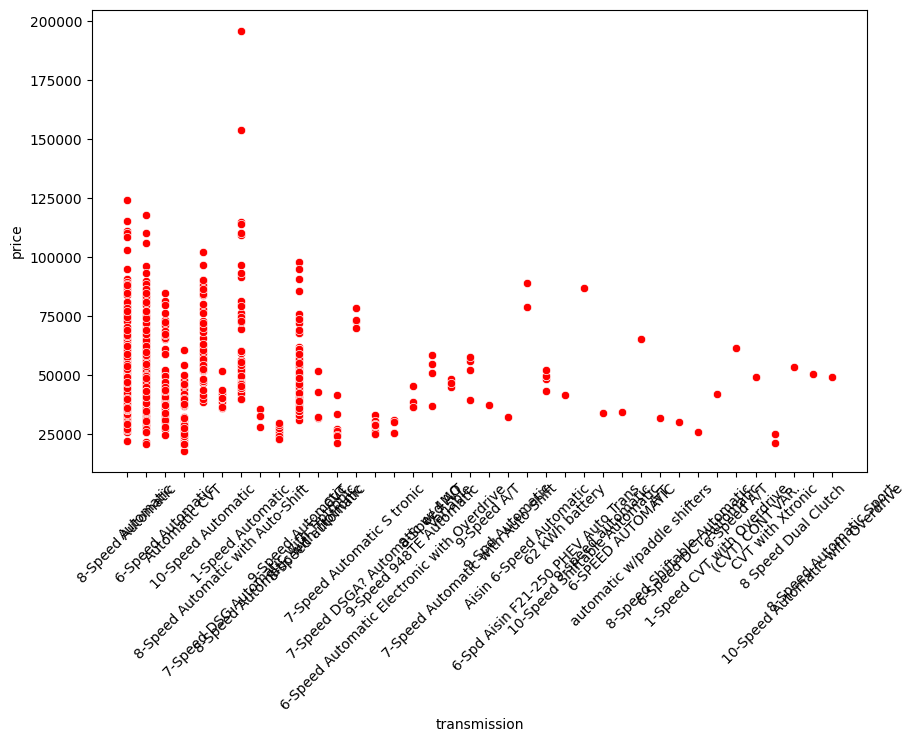

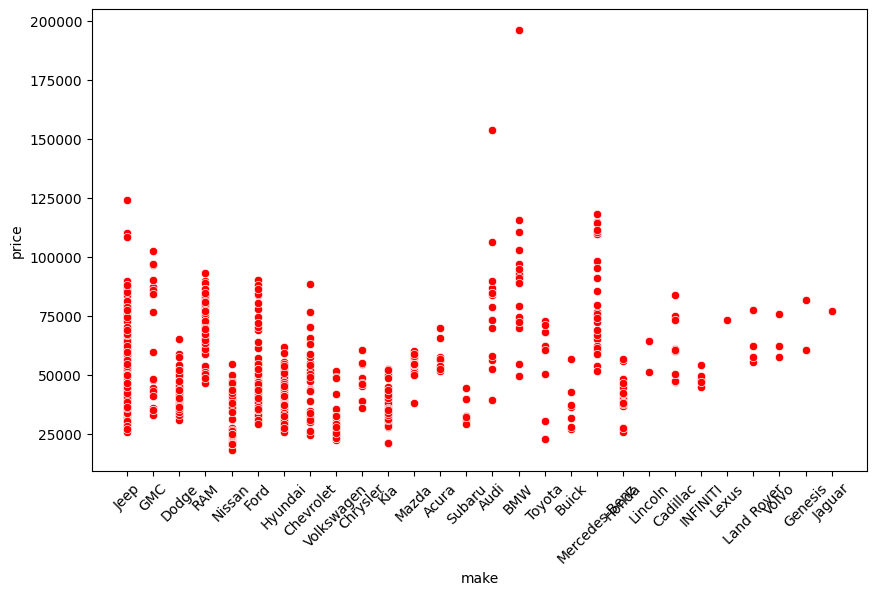

In [107]:
for col in ['fuel', 'transmission', 'make']:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=col,y='price',data=df,color='r')
    plt.xticks(rotation=45)
    plt.show()

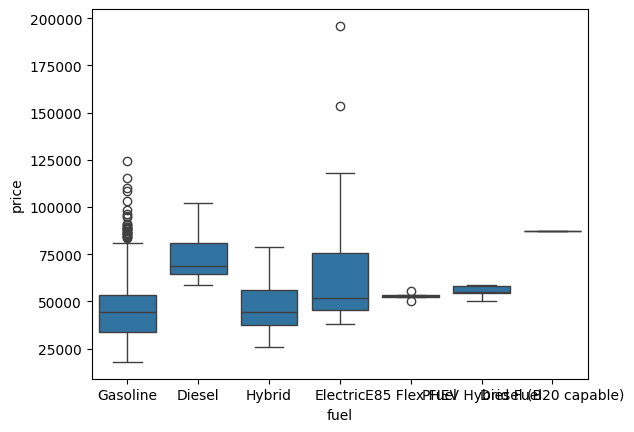

In [108]:
sns.boxplot(x='fuel',y='price',data=df)
plt.show()

In [109]:
y= np.log1p(df['price'])

x=df.drop(['price'],axis=1)

In [87]:
x=pd.get_dummies(x,drop_first=True)

In [89]:
x

,year,cylinders,mileage,doors,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,...,body_Convertible,body_Hatchback,body_Minivan,body_Passenger Van,body_Pickup Truck,body_SUV,body_Sedan,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,2024,6.0,10.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,2024,6.0,1.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,2024,8.0,0.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,2023,8.0,32.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2024,6.0,10.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2024,6.0,0.0,4.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
997,2024,4.0,10.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
999,2024,6.0,20.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1000,2024,6.0,6.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
model=RandomForestRegressor(n_estimators=200,random_state=42)

In [95]:
model.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
y_pred=model.predict(x_test)

In [97]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

MAE  : 0.09
RMSE : 0.13
R²   : 0.847


In [117]:
import joblib
joblib.dump(model, "vehicle_price_model_updated.joblib")
print("Updated model saved successfully!")


Updated model saved successfully!
